In [1]:
# import the libraries 
import numpy as np
import matplotlib.pyplot as plt

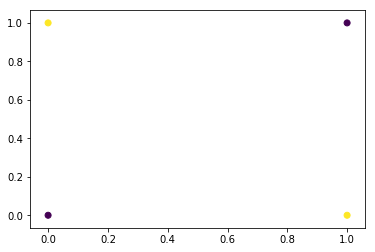

In [9]:
# Create the data
N = 4
D = 2

# XOR
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
T = np.array([0, 1, 1, 0])
plt.scatter(X[:,0],X[:,1],c=T)
plt.show()

In [10]:
# add a column of ones
# ones = np.array([[1]*N]).T
ones = np.ones((N, 1))

# add a column of xy = x*y
xy = (X[:,0] * X[:,1]).reshape(N, 1)
Xb = np.concatenate((ones, xy, X), axis=1)
Xb

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  1.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  1.]])

2.97339775195
2.94334623198
2.91426751279
2.88610107425
2.85879448974
2.83230153516
2.80658080105
2.78159467592
2.75730860203
2.73369052964
2.71071051552
2.6883404254
2.66655371154
2.64532524393
2.62463118011
2.60444886252
2.58475673545
2.56553427619
2.54676193627
2.52842109001
2.51049398854
2.49296371776
2.47581415936
2.45902995431
2.44259646825
2.42649975855
2.41072654283
2.39526416876
2.38010058506
2.36522431365
2.35062442292
2.33629050197
2.32221263597
2.30838138245
2.29478774858
2.28142316944
2.26827948718
2.2553489311
2.24262409857
2.23009793691
2.21776372595
2.20561506154
2.19364583973
2.18185024171
2.17022271955
2.1587579825
2.14745098408
2.1362969097
2.12529116499
2.11442936461
2.10370732171
2.09312103783
2.08266669344
2.07234063878
2.06213938535
2.05205959772
2.04209808577
2.0322517974
2.02251781153
2.01289333154
2.00337567894
1.99396228753
1.98465069769
1.97543855111
1.9663235857
1.95730363079
1.94837660264
1.93954050007
1.93079340044
1.92213345571
1.91355888887
1.9050679903

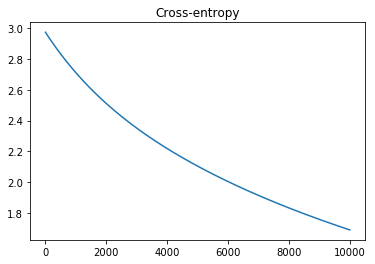

Final w: [-0.11166157 -2.77914798  0.86353569  0.7991059 ]
Final classification rate: 1.0


In [8]:
# randomly initialize the weights
w = np.random.randn(D + 2)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))


Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E


# let's do gradient descent 100 times
learning_rate = 0.001
error = []
for i in range(10000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 100 == 0:
        print (e)

    # gradient descent weight udpate with regularization
    w += learning_rate * ( Xb.T.dot(T - Y) - 0.01*w )

    # recalculate Y
    Y = sigmoid(Xb.dot(w))

plt.plot(error)
plt.title("Cross-entropy")
plt.show()

print ("Final w:", w)
print ("Final classification rate:", 1 - np.abs(T - np.round(Y)).sum() / N)